In [7]:
import pandas as pd
import matplotlib.pyplot as plt
# Reload the Excel file and the specific sheet
df = pd.read_excel("pesquisa_2025-04-08_10_13_52.xlsx", sheet_name='Animals')

# Clean and convert 'GPD Dinâmico' to numeric
df['GPD Dinâmico'] = pd.to_numeric(df['GPD Dinâmico'], errors='coerce')

# Drop rows with missing 'RFID' or 'GPD Dinâmico'
df = df.dropna(subset=['RFID', 'GPD Dinâmico'])

# Convert RFID to string to maintain it as an identifier
df['RFID'] = df['RFID'].astype(str)

# Split into two groups
group_a = df[df['GPD Dinâmico'] < 0.5].copy()
group_b = df[df['GPD Dinâmico'] > 0.5].copy()



C:\Users\crist\AppData\Local\Temp\ipykernel_13824\1879935330.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  group_a['Data de Entrada'] = pd.to_datetime(group_a['Data de Entrada'], errors='coerce')
C:\Users\crist\AppData\Local\Temp\ipykernel_13824\1879935330.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  group_b['Data de Entrada'] = pd.to_datetime(group_b['Data de Entrada'], errors='coerce')


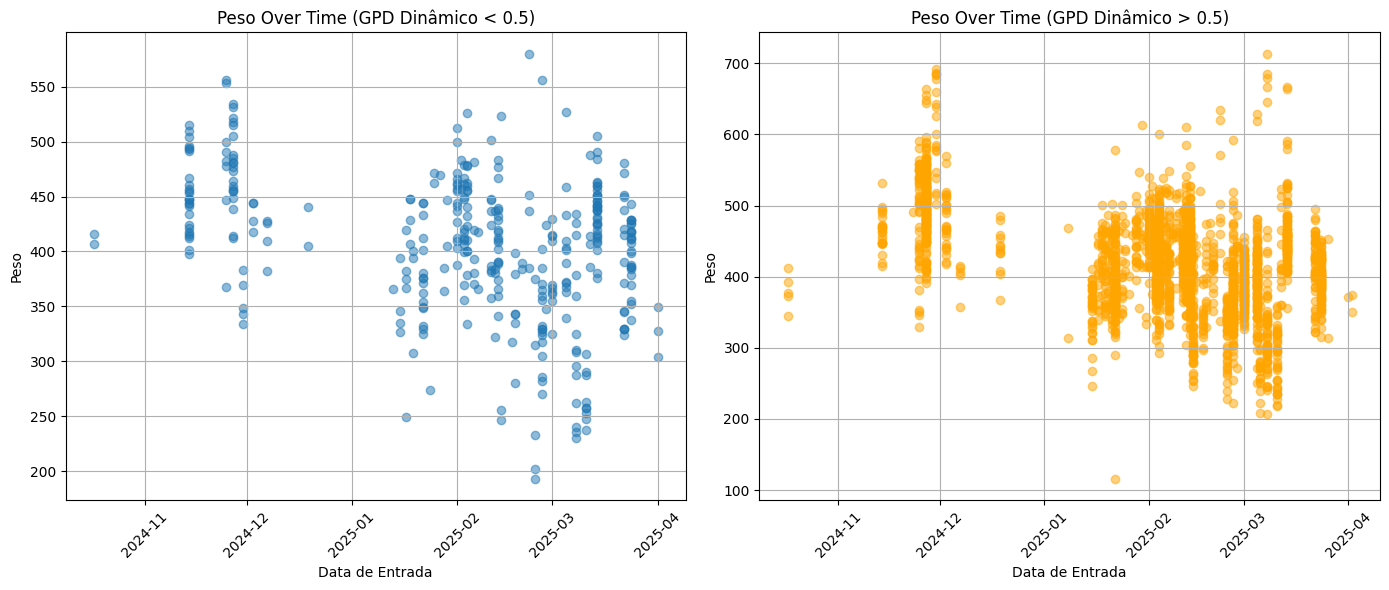

In [9]:
# Convert 'Data de Entrada' to datetime for both groups
group_a['Data de Entrada'] = pd.to_datetime(group_a['Data de Entrada'], errors='coerce')
group_b['Data de Entrada'] = pd.to_datetime(group_b['Data de Entrada'], errors='coerce')

# Drop any remaining rows with missing 'Peso' or 'Data de Entrada'
group_a = group_a.dropna(subset=['Peso', 'Data de Entrada'])
group_b = group_b.dropna(subset=['Peso', 'Data de Entrada'])

# Plotting Peso over time using Data de Entrada
plt.figure(figsize=(14, 6))

# Group A plot
plt.subplot(1, 2, 1)
plt.scatter(group_a['Data de Entrada'], group_a['Peso'], alpha=0.5)
plt.title('Peso Over Time (GPD Dinâmico < 0.5)')
plt.xlabel('Data de Entrada')
plt.ylabel('Peso')
plt.xticks(rotation=45)
plt.grid(True)

# Group B plot
plt.subplot(1, 2, 2)
plt.scatter(group_b['Data de Entrada'], group_b['Peso'], alpha=0.5, color='orange')
plt.title('Peso Over Time (GPD Dinâmico > 0.5)')
plt.xlabel('Data de Entrada')
plt.ylabel('Peso')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


## Selecting only ten of each group

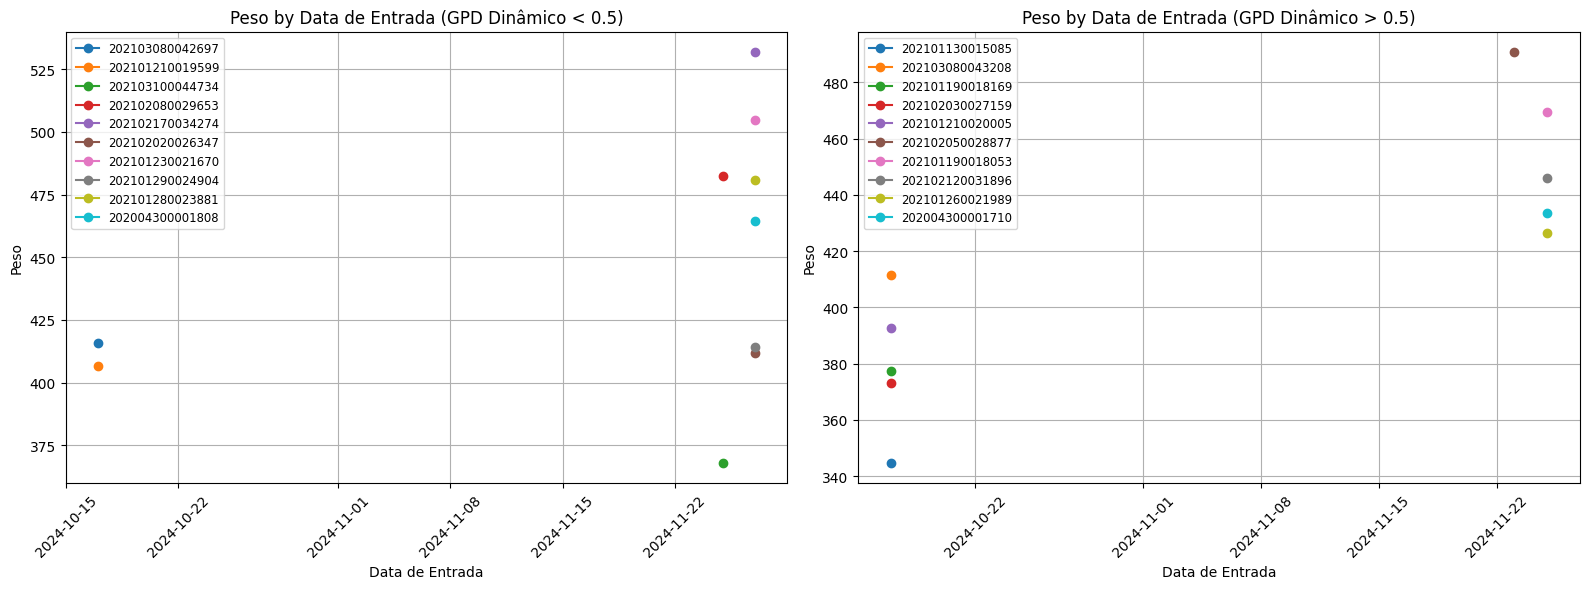

In [ ]:
# Select 10 unique RFID from each group
rfid_sample_a = group_a['RFID'].unique()[:10]
rfid_sample_b = group_b['RFID'].unique()[:10]

# Filter data for these RFIDs
sample_a = group_a[group_a['RFID'].isin(rfid_sample_a)]
sample_b = group_b[group_b['RFID'].isin(rfid_sample_b)]

# Plotting
plt.figure(figsize=(16, 6))

# Group A
plt.subplot(1, 2, 1)
for rfid in rfid_sample_a:
    data = sample_a[sample_a['RFID'] == rfid]
    plt.plot(data['Data de Entrada'], data['Peso'], marker='o', label=rfid)
plt.title('Peso by Data de Entrada (GPD Dinâmico < 0.5)')
plt.xlabel('Data de Entrada')
plt.ylabel('Peso')
plt.xticks(rotation=45)
plt.legend(fontsize='small', loc='best')
plt.grid(True)

# Group B
plt.subplot(1, 2, 2)
for rfid in rfid_sample_b:
    data = sample_b[sample_b['RFID'] == rfid]
    plt.plot(data['Data de Entrada'], data['Peso'], marker='o', label=rfid)
plt.title('Peso by Data de Entrada (GPD Dinâmico > 0.5)')
plt.xlabel('Data de Entrada')
plt.ylabel('Peso')
plt.xticks(rotation=45)
plt.legend(fontsize='small', loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()